In [1]:
what_this_notebook_contains = {1: "preparing and loading of data",
                               2: "Building the Model",
                               3: "Fitting the model to data(training the model)",
                               4: "Inferencing - Making predictions and evaluating the model",
                               5: "Saving and loading the model",
                               6: "Putting it all together"}
what_this_notebook_contains

{1: 'preparing and loading of data',
 2: 'Building the Model',
 3: 'Fitting the model to data(training the model)',
 4: 'Inferencing - Making predictions and evaluating the model',
 5: 'Saving and loading the model',
 6: 'Putting it all together'}

In [2]:
pip install jupyter_contrib_nbextensions

Note: you may need to restart the kernel to use updated packages.


In [3]:
import torch
from torch import nn
import matplotlib.pyplot as plt

## 1. Preparing and loading the data

In [4]:
# creating some custom sample data
# y = wx + b

In [5]:
weight = 0.5
bias = 0.3

start = 1
end = 10
step = 0.2
X = torch.arange(start, end, step).unsqueeze(dim = 1)

In [6]:
X, len(X)

(tensor([[1.0000],
         [1.2000],
         [1.4000],
         [1.6000],
         [1.8000],
         [2.0000],
         [2.2000],
         [2.4000],
         [2.6000],
         [2.8000],
         [3.0000],
         [3.2000],
         [3.4000],
         [3.6000],
         [3.8000],
         [4.0000],
         [4.2000],
         [4.4000],
         [4.6000],
         [4.8000],
         [5.0000],
         [5.2000],
         [5.4000],
         [5.6000],
         [5.8000],
         [6.0000],
         [6.2000],
         [6.4000],
         [6.6000],
         [6.8000],
         [7.0000],
         [7.2000],
         [7.4000],
         [7.6000],
         [7.8000],
         [8.0000],
         [8.2000],
         [8.4000],
         [8.6000],
         [8.8000],
         [9.0000],
         [9.2000],
         [9.4000],
         [9.6000],
         [9.8000]]),
 45)

In [7]:
y = weight * X + bias
y, len(y)

(tensor([[0.8000],
         [0.9000],
         [1.0000],
         [1.1000],
         [1.2000],
         [1.3000],
         [1.4000],
         [1.5000],
         [1.6000],
         [1.7000],
         [1.8000],
         [1.9000],
         [2.0000],
         [2.1000],
         [2.2000],
         [2.3000],
         [2.4000],
         [2.5000],
         [2.6000],
         [2.7000],
         [2.8000],
         [2.9000],
         [3.0000],
         [3.1000],
         [3.2000],
         [3.3000],
         [3.4000],
         [3.5000],
         [3.6000],
         [3.7000],
         [3.8000],
         [3.9000],
         [4.0000],
         [4.1000],
         [4.2000],
         [4.3000],
         [4.4000],
         [4.5000],
         [4.6000],
         [4.7000],
         [4.8000],
         [4.9000],
         [5.0000],
         [5.1000],
         [5.2000]]),
 45)

In [8]:
# Spliting the data into train and test sets
len(X),len(y)

(45, 45)

In [9]:
train_split = int(0.8 * len(X))
train_split

36

In [10]:
X_train, y_train, X_test, y_test = X[:train_split],y[:train_split],X[train_split:],y[train_split:]

In [11]:
len(X_train), len(y_train), len(X_test), len(y_test)

(36, 36, 9, 9)

In [12]:
# Visualization of the data
def plot_distributions(train_data = X_train,
                       train_label = y_train,
                       test_data = X_test,
                       test_label = y_test,
                       predictions = None):
    """
    plots the train data and the test data and compares them with predictions
    """
    plt.figure(figsize = (8,5))
    plt.title("Plotting of Sample Data")
    # plot training data in blue
    plt.scatter(train_data, train_label, c = "g", s = 4, label = "Training Data")
    plt.scatter(test_data, test_label, c = "b", s = 4, label = "Testing Data")

    # if predictions are available -> plot the predictions
    if predictions is not None:
        plt.scatter(test_data, predictions, c = "r", s = 5, label = "Predictions")

    # Showing the legend
    plt.legend(prop = {"size" : 10})
        

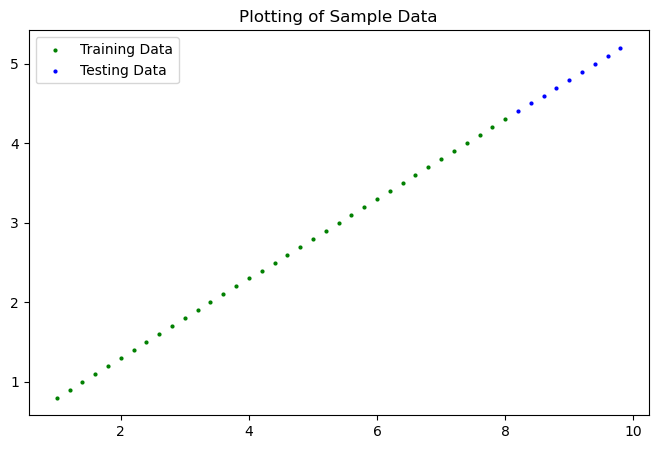

In [13]:
plot_distributions()

## 2. Build Model

In [79]:
# Creating Linear Regression Model Class

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.weights = nn.Parameter(torch.randn(1, # start with a random weight and try to adjust it to the ideal weight
                                               requires_grad = True,
                                               dtype = torch.float))

        self.bias = nn.Parameter(torch.randn(1,
                                            requires_grad = True,
                                            dtype = torch.float))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias
                                    
        

In [107]:
# checking the contents of the model
torch.manual_seed(92)

model_0 = LinearRegressionModel()

In [108]:
# checking the nn.Parrameter within the nn.Module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([-0.0361], requires_grad=True),
 Parameter containing:
 tensor([0.1703], requires_grad=True)]

In [109]:

# We can also get the state (what the model contains) of the model using
model_0.state_dict()

OrderedDict([('weights', tensor([-0.0361])), ('bias', tensor([0.1703]))])

In [110]:
weight, bias

(0.5, 0.3)

In [111]:
model_0.weights, model_0.bias

(Parameter containing:
 tensor([-0.0361], requires_grad=True),
 Parameter containing:
 tensor([0.1703], requires_grad=True))

In [112]:
# We make the predictions using torch.inference_mode()
with torch.inference_mode():
  y_preds = model_0(X_test)

In [113]:
y_preds

tensor([[-0.1259],
        [-0.1331],
        [-0.1404],
        [-0.1476],
        [-0.1548],
        [-0.1620],
        [-0.1693],
        [-0.1765],
        [-0.1837]])

In [114]:

# checking the predictions
print(f"Number of Testing Samples: {len(X_test)}")
print(f"Number of Predictions Made: {len(y_preds)}")
print(f"Predictions Values - \n {y_preds}")


Number of Testing Samples: 9
Number of Predictions Made: 9
Predictions Values - 
 tensor([[-0.1259],
        [-0.1331],
        [-0.1404],
        [-0.1476],
        [-0.1548],
        [-0.1620],
        [-0.1693],
        [-0.1765],
        [-0.1837]])


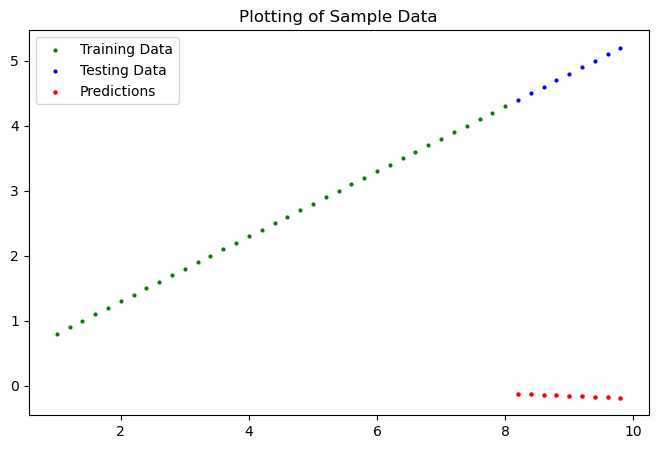

In [115]:
plot_distributions(predictions = y_preds)

In [116]:
y_test - y_preds

tensor([[4.5259],
        [4.6331],
        [4.7404],
        [4.8476],
        [4.9548],
        [5.0620],
        [5.1693],
        [5.2765],
        [5.3837]])

In [117]:
## Creating the loss function
loss_fn = nn.L1Loss()

## Creating the optimizer
optimizer = torch.optim.Adam(params = model_0.parameters(), lr = 0.01)

## Creating training loop and testing loop

The training loop involves the model going through the training data and learning the relationships between the features and labels.

The testing loop involves going through the testing data and evaluating how good the patterns are that the model learned on the training data (the model never see's the testing data during training).

Each of these is called a "loop" because we want our model to look (loop through) at each sample in each dataset.

## Pytorch Optimmization

train time-
1. do the forward pass
2. claculate the loss
3. optimizer zero grad
4. loss backward

Optimizer Step

Test time -
1. with torch no grad
2. do the forward pass
3. calculate loss
4. watch it go down


PyTorch training loop
For the training loop, we'll build the following steps:

Number	Step name	What does it do?	Code example
1	Forward pass	The model goes through all of the training data once, performing its forward() function calculations.	model(x_train)
2	Calculate the loss	The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are.	loss = loss_fn(y_pred, y_train)
3	Zero gradients	The optimizers gradients are set to zero (they are accumulated by default) so they can be recalculated for the specific training step.	optimizer.zero_grad()
4	Perform backpropagation on the loss	Computes the gradient of the loss with respect for every model parameter to be updated (each parameter with requires_grad=True). This is known as backpropagation, hence "backwards".	loss.backward()
5	Update the optimizer (gradient descent)	Update the parameters with requires_grad=True with respect to the loss gradients in order to improve them.	optimizer.step()

Sure, let's break down each step of the PyTorch training loop in more detail:

### 1. Forward pass

**What does it do?**
- During the forward pass, the model processes the input data (`x_train`) through its layers and produces an output or prediction (`y_pred`).

**Code example:**
```python
# Assuming 'model' is your PyTorch model instance and 'x_train' is your input data
y_pred = model(x_train)
```

### 2. Calculate the loss

**What does it do?**
- After obtaining predictions (`y_pred`), the next step is to calculate how different these predictions are from the actual target values (`y_train`). This difference is captured by a loss function, which measures the model's performance.

**Code example:**
```python
# Assuming 'loss_fn' is your loss function (e.g., nn.CrossEntropyLoss, nn.MSELoss)
loss = loss_fn(y_pred, y_train)
```

### 3. Zero gradients

**What does it do?**
- Before computing the gradients of the loss with respect to the model parameters, it's important to clear out any gradients that might be lingering from previous computations. This step ensures that gradients are fresh for the current batch of data.

**Code example:**
```python
optimizer.zero_grad()
```

### 4. Perform backpropagation on the loss

**What does it do?**
- Backpropagation is the process of computing the gradient of the loss with respect to all model parameters. These gradients indicate the direction and magnitude of the change needed in each parameter to minimize the loss.

**Code example:**
```python
loss.backward()
```

### 5. Update the optimizer (gradient descent)

**What does it do?**
- Once the gradients are computed, the optimizer adjusts the parameters of the model in the direction that reduces the loss. This optimization step is typically performed using an optimization algorithm like stochastic gradient descent (SGD) or Adam.

**Code example:**
```python
optimizer.step()
```

### Summary

- **Forward pass**: Computes predictions (`y_pred`) using input data (`x_train`).
- **Calculate the loss**: Measures how far off predictions (`y_pred`) are from actual targets (`y_train`).
- **Zero gradients**: Resets gradients to zero before computing them for the current batch.
- **Backpropagation**: Computes gradients of the loss with respect to model parameters.
- **Optimizer step**: Updates model parameters using the gradients to minimize the loss.

These steps together constitute the core of the training loop in PyTorch, where the model learns from the data by iteratively adjusting its parameters to improve performance on the task at hand.


PyTorch testing loop
As for the testing loop (evaluating our model), the typical steps include:

Number	Step name	What does it do?	Code example
1	Forward pass	The model goes through all of the training data once, performing its forward() function calculations.	model(x_test)
2	Calculate the loss	The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are.	loss = loss_fn(y_pred, y_test)
3	Calulate evaluation metrics (optional)	Alongisde the loss value you may want to calculate other evaluation metrics such as accuracy on the test set.	Custom functions


Certainly! Let's break down each step of the PyTorch testing loop in more detail:

### 1. Forward pass

**What does it do?**
- During the forward pass in the testing loop, the model processes the input data (`x_test`) through its layers and produces predictions (`y_pred`). This step is identical to the forward pass during training.

**Code example:**
```python
# Assuming 'model' is your trained PyTorch model instance and 'x_test' is your test data
y_pred = model(x_test)
```

### 2. Calculate the loss

**What does it do?**
- After obtaining predictions (`y_pred`), the next step is to calculate how different these predictions are from the actual target values (`y_test`). This is done using a loss function, similar to the training loop.

**Code example:**
```python
# Assuming 'loss_fn' is your loss function (e.g., nn.CrossEntropyLoss, nn.MSELoss) and 'y_test' are the ground truth labels
loss = loss_fn(y_pred, y_test)
```

### 3. Calculate evaluation metrics (optional)

**What does it do?**
- In addition to calculating the loss, you may want to compute other evaluation metrics to assess the performance of your model on the test set. Common metrics include accuracy, precision, recall, F1-score, etc. These metrics provide additional insights beyond the loss value.

**Code example:**
```python
# Example of calculating accuracy (assuming classification task)
# 'y_pred' are predicted labels and 'y_test' are true labels
_, predicted = torch.max(y_pred, 1)  # Assuming y_pred is logits, get the predicted class indices
correct = (predicted == y_test).sum().item()
accuracy = correct / len(y_test)
print("Accuracy:", accuracy)
```

### Summary

- **Forward pass**: The model predicts outputs (`y_pred`) for test data (`x_test`).
- **Calculate the loss**: Measures the difference between predictions (`y_pred`) and actual targets (`y_test`) using a loss function.
- **Calculate evaluation metrics**: Optional step to compute additional metrics (like accuracy) to evaluate model performance on the test set.

### Additional Notes

- **Model Evaluation**: During testing, the model is typically evaluated on data it hasn't seen during training to assess its generalization ability.
- **Loss Function**: The choice of loss function depends on the problem (e.g., classification, regression) and should be chosen carefully to reflect the nature of the task and the type of output your model produces.
- **Evaluation Metrics**: Besides accuracy, you might calculate other metrics depending on the specific requirements of your problem (e.g., precision, recall for classification tasks; mean squared error for regression tasks).

This testing loop ensures that after training, you can assess how well your model performs on unseen data using both the loss function and additional evaluation metrics as needed.

torch.manual_seed(9)

epochs = 100

# create empty loss lits to track the values
train_loss_values = []
test_loss_values = []
epochs_count = []

for epoch in range(epochs):

  ## Training

  # Put the model in training mode











## Building a Training Loop and Testing Loop

0. Loop through the training data
1. Forward pass(training data X moving the forward function of the model)
2. Calculate the Loss
3. Optimizer Zero Grad
4. Loss Backward - move backwards through the network to calculate the gradients of each of the paramters of the model w.r.t loss
5. Optimizer Step _ Use the optimizer to adjust our model's params to reduce the Loss

In [118]:
EPOCHS = 200

epoch_count = []
test_loss_values = []
loss_values = []

# 0. Loop through the data
for epoch in range(EPOCHS):

    # set the model to training mode
    model_0.train()# train mode sets all the params in the model to require_grad = True

    #1. Forward pass
    y_preds = model_0.forward(X_train)

    #2. Calculate the loss
    loss = loss_fn(y_preds,y_train)

    #3. Optimizer zero grad
    optimizer.zero_grad()

    #4. Perform Backpropogation on loss w.r.t params of the model
    loss.backward()

    #5. optimizer step
    optimizer.step()

    ## TESTING LOOP
    model_0.eval() #Turns off different functions which is not needed during testing the model
    with torch.inference_mode(): # turns off gradient tracking and other functionalities not required for testing
       
        # 1. do the forward pass in testing mode
        test_preds = model_0.forward(X_test)

        # 2. Calculate the test loss
        test_loss = loss_fn(test_preds, y_test)

    # PRINT OUT WHATS HAPPENING
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f" Epoch: {epoch}, Test Loss: {test_loss}, Loss:{loss}")

 Epoch: 0, Test Loss: 4.854804515838623, Loss:2.5422303676605225
 Epoch: 10, Test Loss: 3.8548049926757812, Loss:1.9922302961349487
 Epoch: 20, Test Loss: 2.854804754257202, Loss:1.4422305822372437
 Epoch: 30, Test Loss: 1.854804515838623, Loss:0.8922305703163147
 Epoch: 40, Test Loss: 0.8615406155586243, Loss:0.36679959297180176
 Epoch: 50, Test Loss: 0.02980719693005085, Loss:0.13592249155044556
 Epoch: 60, Test Loss: 0.15259568393230438, Loss:0.1210821345448494
 Epoch: 70, Test Loss: 0.31670475006103516, Loss:0.1223246231675148
 Epoch: 80, Test Loss: 0.12487030029296875, Loss:0.09353690594434738
 Epoch: 90, Test Loss: 0.14362484216690063, Loss:0.08034344017505646
 Epoch: 100, Test Loss: 0.12038554251194, Loss:0.06678365916013718
 Epoch: 110, Test Loss: 0.08721314370632172, Loss:0.051514334976673126
 Epoch: 120, Test Loss: 0.05311351269483566, Loss:0.03590422496199608
 Epoch: 130, Test Loss: 0.029205322265625, Loss:0.019590402022004128
 Epoch: 140, Test Loss: 0.0026264190673828125, L

In [119]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5013])), ('bias', tensor([0.3027]))])

In [120]:
weight, bias

(0.5, 0.3)

In [121]:
with torch.inference_mode():
    y_preds = model_0(X_test)

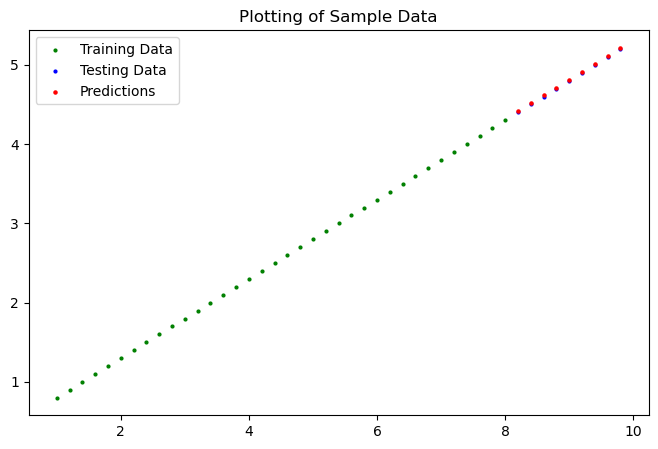

In [122]:
plot_distributions(predictions=y_preds)

In [124]:
loss_values, test_loss_values

([tensor(2.5422, grad_fn=<MeanBackward0>),
  tensor(1.9922, grad_fn=<MeanBackward0>),
  tensor(1.4422, grad_fn=<MeanBackward0>),
  tensor(0.8922, grad_fn=<MeanBackward0>),
  tensor(0.3668, grad_fn=<MeanBackward0>),
  tensor(0.1359, grad_fn=<MeanBackward0>),
  tensor(0.1211, grad_fn=<MeanBackward0>),
  tensor(0.1223, grad_fn=<MeanBackward0>),
  tensor(0.0935, grad_fn=<MeanBackward0>),
  tensor(0.0803, grad_fn=<MeanBackward0>),
  tensor(0.0668, grad_fn=<MeanBackward0>),
  tensor(0.0515, grad_fn=<MeanBackward0>),
  tensor(0.0359, grad_fn=<MeanBackward0>),
  tensor(0.0196, grad_fn=<MeanBackward0>),
  tensor(0.0028, grad_fn=<MeanBackward0>),
  tensor(0.0061, grad_fn=<MeanBackward0>),
  tensor(0.0049, grad_fn=<MeanBackward0>),
  tensor(0.0025, grad_fn=<MeanBackward0>),
  tensor(0.0123, grad_fn=<MeanBackward0>),
  tensor(0.0120, grad_fn=<MeanBackward0>)],
 [tensor(4.8548),
  tensor(3.8548),
  tensor(2.8548),
  tensor(1.8548),
  tensor(0.8615),
  tensor(0.0298),
  tensor(0.1526),
  tensor(0.31

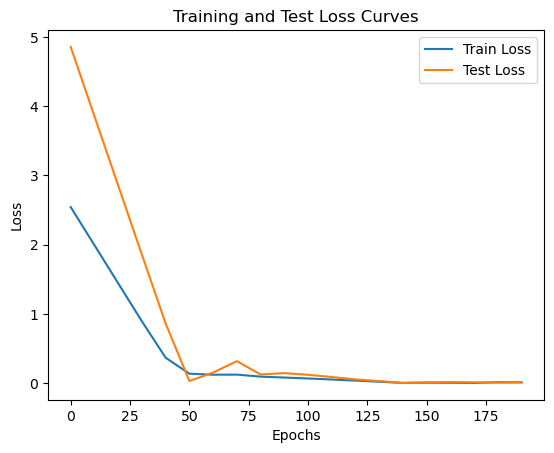

In [132]:
# plot the loss curves
import numpy as np
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()),label = "Train Loss")
plt.plot(epoch_count, np.array(torch.tensor(test_loss_values).numpy()), label = "Test Loss")
plt.title("Training and Test Loss Curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

### Saving the Model in Pytorch

1. torch.save() - allows you to save a Pytorch object in Python's pickle format
2. torch.load() - allows you to load a saved pytorch model
3. torch.nn.Module.load_state_dict() - this allows to load a model's saved state dictionary

In [133]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5013])), ('bias', tensor([0.3027]))])

In [136]:
# saving our pytorch model
from pathlib import Path

# Craete the model directory
MODEL_PATH = Path("Models")
MODEL_PATH.mkdir(parents = True, exist_ok = True)

# Create the Model Save Path
MODEL_NAME = "01_pytorch_workflow_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model's state dict
torch.save(model_0.state_dict(), MODEL_SAVE_PATH)

## Loading the Saved Model

In [137]:
# as we saved the model's state_dict instead of the entire model. we will create a new instance of our model class
# and load the saved state_dict() into that model

In [139]:
loaded_model_0 = LinearRegressionModel()

In [140]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([-0.2979])), ('bias', tensor([-1.8902]))])

In [143]:
# load the saved state_dict() of the model_0, this will update the new instance with updated params
loaded_model_0.load_state_dict(torch.load(f = MODEL_SAVE_PATH, map_location= torch.device('cpu')))

<All keys matched successfully>

In [144]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.5013])), ('bias', tensor([0.3027]))])

In [146]:
# Making predictions using the new model
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

In [148]:
loaded_model_preds

tensor([[4.4133],
        [4.5136],
        [4.6138],
        [4.7141],
        [4.8144],
        [4.9146],
        [5.0149],
        [5.1151],
        [5.2154]])

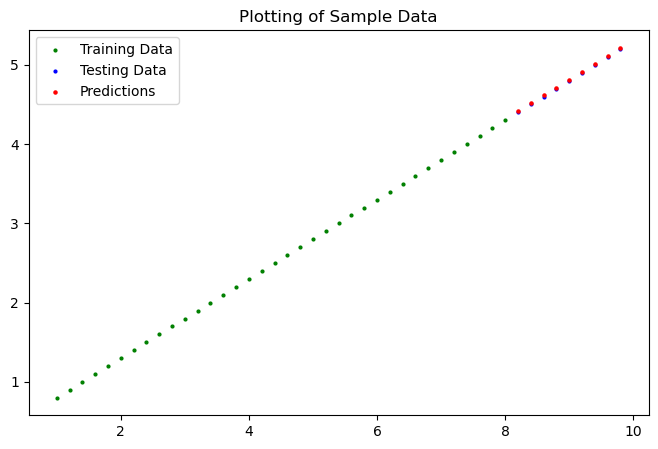

In [147]:
plot_distributions(predictions = loaded_model_preds)